In [461]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [462]:
# Load the dataset
df_raw = pd.read_csv("ecommerce-session-bigquery.csv")
df_raw

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactons,timeOnSiite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8518740059623315737,Referral,83144,United States,Ann Arbor,NaN,NaN,561.0,18.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9996,1592171014215970461,Organic Search,302378,Colombia,Bogota,NaN,NaN,365.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9997,6776942687101397292,Affiliates,41387,Israel,not available in demo dataset,NaN,NaN,107.0,7.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN
9998,3008082643543388126,Organic Search,28613,Canada,Montreal,NaN,NaN,93.0,11.0,NaN,...,NaN,NaN,NaN,NaN,Bags,NaN,/google+redesign/,0,1,NaN


The dataset contains 10,000 rows and 32 columns. Since using all columns would be inefficient, I will first consult ChatGPT to identify the most relevant columns based on the objectives of this case study.

## Phase 1: Initial Analysis Using ChatGPT  
### 1. **Generate Insights with ChatGPT**  


#### 1.1 Determining the Columns Used

***ChatGPT prompts:***

I have this case study: 
Our client, an e-commerce platform, wants to gain a deeper understanding of user behavior to improve their platform. The management has identified key analytical needs, including:  
1. **Identifying Top Products:** Determine the top-selling products based on total transaction revenue per day.   
2. **Detecting Anomalies:** Identify unusual transaction patterns, such as a sharp increase or decrease in sales for a specific product.   
3. **Finding Most Profitable Locations:** Determine which city or province generates the highest total transaction revenue.

The following are the column names in the data that will be used for analysis:
Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',        'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',        'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',        'productQuantity', 'productPrice', 'productRevenue', 'productSKU',        'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',        'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',        'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',        'eCommerceAction_step', 'eCommerceAction_option'],       dtype='object').

Please provide recommendations for columns that will be useful for completing the analysis objectives. 

***ChatGPT respons:***

Got it — here’s how I’d map the columns you have to your analysis goals:

1. Identifying Top Products (Top-selling products by daily revenue)
Useful columns:
    - date → To group revenue by day.
    - v2ProductName → To identify the product name.
    - productRevenue → Revenue per product (could be summed per day).
    - productSKU → (Optional) For a unique product ID if needed.
2. Detecting Anomalies (Unusual patterns in product sales)
Useful columns:
    - date → To observe daily trends.
    - v2ProductName → To track per-product trends.
    - productRevenue → To measure daily revenue fluctuations.
    - productQuantity → (Optional) If you want to monitor sales quantity anomalies alongside revenue.
3. Finding Most Profitable Locations (Cities/provinces with highest revenue)
Useful columns:
    - date → (Optional) If you want to track trends over time.
    - city → To group revenue by city.
    - country → (Optional) In case multiple cities share names but are in different countries.
    - totalTransactionRevenue or transactionRevenue → Total revenue per transaction (might depend which field is populated more consistently).

- Quick Notes:
    - productRevenue usually refers to revenue per product unit.
    - totalTransactionRevenue is likely at the transaction level (multiple products summed together).
    - You might want to verify if transactionRevenue and totalTransactionRevenue are duplicates or have different logic.
    - productSKU can be very helpful if product names are messy or not unique.

In [463]:
# Check if `transactionRevenue` and `totalTransactionRevenue` are duplicate or have different logic
df_raw[["totalTransactionRevenue","transactionRevenue"]].describe()

,totalTransactionRevenue,transactionRevenue
count,6.190000e+02,0.0
mean,2.103635e+08,NaN
std,5.656026e+08,NaN
min,3.530000e+06,NaN
25%,5.508000e+07,NaN
50%,9.542000e+07,NaN
75%,1.866600e+08,NaN
max,6.831960e+09,NaN


It can be seen that the `totalTransactionRevenue` column has descriptive statistical information but the `transactionRevenue` column does not. This will be the information for the reply response to the previous ChatGPT question.

***Reply to previous ChatGPT question***

After I checked the `transactionRevenue` and `totalTransactionRevenue` columns, in the `transactionRevenue` column using the describe() function produces information `count` = 0.0 and other information is `NaN`. And for the `totalTransactionRevenue` column has a value in the information using the describe() function.

***ChatGPT respons:***

Good job checking that!
From what you found, it’s clear:
- transactionRevenue → completely empty (all NaN, no use).
- totalTransactionRevenue → has valid data, so this is the one you should use for any transaction-level revenue analysis.

✅ So for the city/province profitability and anything at the overall transaction level, use totalTransactionRevenue.

Also, when you do your analysis, you might need to remember that totalTransactionRevenue is often stored in micros (especially if it's Google Analytics data).
Meaning: you might need to divide it by 1,000,000 to get actual dollar values.

#### 1.2 Determining Structure Analysis

***ChatGPT prompts:***

From the previous key analysis, provide recommendations for the analysis structure using Python and explain why this stage needs to be carried out (explain the stages only without providing the code)

***ChatGPT respons:***

Alright! Here's a recommended analysis structure in Python, aligned with your three key goals, with explanations for why each stage is important:
1. Data Loading
- What to do: 
    - Load the dataset into a DataFrame (e.g., using pandas).
    - Why: This is the starting point. You need the data in memory (DataFrame) to perform any analysis, cleaning, or transformation.

2. Data Exploration and Initial Cleaning
- What to do:
    - Check for missing values, data types, duplicates.
    - Understand the distribution of key columns like productRevenue, totalTransactionRevenue, etc.
- Why: 
    - To detect issues early (like empty columns — you already found one!).
    - Ensure you know the correct data types (e.g., date should be datetime, revenues should be numeric).
    - Helps plan correct transformations later.

3. Data Preprocessing
- What to do:
    - Convert columns to correct types (date, revenue scaling if needed).
    - Fill or drop missing values appropriately.
    - Filter out irrelevant rows (e.g., sessions without transactions).
- Why:
    - Clean and consistent data is critical for accurate analysis.
    - Prevents errors when aggregating, joining, or plotting.

4. Feature Engineering
- What to do:
    - Create new columns if necessary (e.g., daily revenue per product, daily revenue per city).
    - Aggregate transactions by date, product, or city.
- Why:
    - It prepares the data for direct use in analysis (e.g., easier to rank top products, detect anomalies).
    - Simplifies the modeling of behavior trends.

5. Analysis per Objective
- Identifying Top Products:
    - Group by date and v2ProductName, sum productRevenue, and rank daily.
- Detecting Anomalies:
    - Analyze daily revenue patterns for each product.
    - Calculate day-over-day changes to spot spikes or drops.
- Finding Most Profitable Locations:
    - Group by city and sum totalTransactionRevenue, rank cities.
- Why:
    - Directly answers each business question.
    - Structured aggregation ensures clarity and correctness.

6. Visualization
- What to do:
    - Plot top products per day (bar charts).
    - Plot revenue trends for anomaly detection (line charts).
    - Plot most profitable cities (bar chart or map visualization if needed).
- Why:
    - Makes patterns and insights easy to understand for stakeholders.
    - Helps quickly spot trends and anomalies visually.

7. Reporting/Exporting
- What to do:
    - Summarize findings into a report or export results as CSV/excel if needed.
Why:
    - So the business team can use the insights for action (like marketing or operational improvements).

#### 1.3. Determining the statistical method to be used

***ChatGPT prompts:***

Please provide recommendations for statistical methods that I can use in the analysis structure that you recommended earlier.

***ChatGPT respons:***

Absolutely! Here’s a breakdown of recommended statistical methods you can use at each stage of the analysis I proposed earlier:
1. Data Exploration and Initial Cleaning
- Statistical Methods:
    - Descriptive statistics (mean, median, std, min, max, percentiles)
        → Helps you understand the basic distribution of your revenues, pageviews, time on site, etc.
    - Missing value analysis (percentage of missing per column)
        → To decide whether to impute, drop, or leave missing data.
- Why:
    - You need a baseline understanding of data quality and distributions before moving forward.

2. Data Preprocessing
- Statistical Methods:
    - Outlier detection (e.g., using IQR method or z-scores)
        → Important if you want to clean data before modeling or visualizing.
    - Normalization or Scaling (optional, if you later do anomaly detection using distance-based methods)
- Why:
    - Ensures your data isn’t biased by extreme values and is ready for correct aggregation or pattern detection.

3. Feature Engineering
- Statistical Methods:
    - Aggregation functions (sum, average, count, standard deviation)
        → To compute total daily product revenues, total revenues per city, etc.
    - Rolling averages (moving average)
        → Useful for smoothing revenue trends over time, especially for anomaly detection.
- Why:
    - Enhances your raw data into formats that make trends and insights much easier to spot.

4. Analysis per Objective
- For Top Products:
    - Ranking/percentile calculation
        → Identify top-selling products per day based on productRevenue.
- For Anomaly Detection:
    - Time Series Decomposition (trend, seasonality, residual)
        → Helps you separate regular patterns from true anomalies.
    - Z-score method or Modified Z-score
        → Detect whether a product's daily revenue is significantly higher/lower than the average.
    - Interquartile Range (IQR) based anomaly detection
        → Simple, non-parametric way to find unusually high or low sales.
- For Most Profitable Locations:
    - Group-by aggregations
        → Sum total revenue by city, then use basic descriptive stats to identify top performers.
- Why:
    - You use appropriate methods to both summarize and detect unusual behaviors in sales and revenue data.

5. Visualization
- Statistical Methods:
    - Confidence intervals on revenue trends
        → (Optional) Visualize expected ranges and spot data points falling outside.
    - Control charts
        → Useful if you want to monitor revenue stability over time like in manufacturing quality control (adaptable here).
- Why:
    - Makes your insights statistically stronger and shows the range of normal vs abnormal behavior.

6. Reporting/Exporting
- Statistical Methods:
    - Summary statistics tables
        → Summarize top products, top cities, and detected anomalies.
- Why:
    - Provides quantitative evidence behind your business insights, not just visual trends.

### 2. Evaluate ChatGPT’s Responses

#### 2.1 Determining the Columns Used
Based on the previous responses, ChatGPT successfully recommended relevant columns for the case study analysis. Out of 32 columns, 8 were selected to align with the key analytical needs.

In addition to the recommended columns, fullVisitorId is also needed as a unique identifier for visitors, and `v2ProductCategory` is included to provide a broader product category for easier interpretation during visualization. The `productSKU` column was deemed unnecessary for this analysis.

ChatGPT also identified columns that potentially contain duplicate information. Removing these columns will help speed up and simplify the data cleaning and analysis process.

Column that will be use:
1. Identifying Top Products (Top-selling products by daily revenue) -> `date`, `v2ProductName`, `v2ProductCategory` ,`productRevenue`
2. Detecting Anomalies (Unusual patterns in product sales) ->
`date`, `v2ProductName`, `v2ProductCategory`,`productRevenue`, `productQuantity`
2. Finding Most Profitable Locations (Cities/provinces with highest revenue) -> `date`, `city`, `country`, `totalTransactionRevenue`

#### 2.2 Determining Structure Analysis
In this part, ChatGPT initially provided a code-based response. However, since I wanted to focus on getting recommendations for the structure of the analysis, I modified my prompt to request explanations only (e.g., "explain the stages only without providing the code").

ChatGPT recommended several Feature Engineering steps. In my opinion, these steps were not critical because the analysis objectives were already clearly defined, so I chose to focus directly on addressing the main objectives.

After that, ChatGPT provided a good response regarding the analysis structure. However, the explanation mainly covered general stages and did not specify the statistical methods that could be applied at each stage. Therefore, in the next step, I plan to ask about the appropriate statistical methods.


#### 2.3 Determining the Statistical Method to be Used
In this section, ChatGPT provided recommendations for suitable analysis methods and explained their functions.

During the data processing phase, several statistical techniques such as outlier cleaning, normalization, scaling, and rolling average were suggested. However, I believe these methods are less appropriate for this context. The primary goal of this analysis is to understand the real conditions of e-commerce transactions, not to build a machine learning model. Therefore, it is important to preserve the original nature of the data. Significant alterations could lead to the loss of valuable information relevant to business insights. Data should remain in its original form unless clear recording errors are found.

For the "Analysis per Objective" stage, ChatGPT recommended methods such as time series decomposition, Z-score, and IQR for anomaly detection. Each method has specific requirements: time series decomposition requires continuous time series data (no gaps), Z-score assumes a normal distribution, while IQR can be applied even if the data is not normally distributed. Thus, preliminary data observation is necessary.

Moving forward, I will proceed with the analysis based on ChatGPT’s previous suggestions combined with my own judgment.

## Phase 2: Perform Analysis and Improving the Solution  

### 1. Data Loading

In [464]:
# Select relevant columns from the raw dataframe for analysis
df = df_raw[["fullVisitorId","date", "v2ProductName", "v2ProductCategory","productRevenue", "productQuantity",
         "city", "country", "totalTransactionRevenue"]]
df.head()

,fullVisitorId,date,v2ProductName,v2ProductCategory,productRevenue,productQuantity,city,country,totalTransactionRevenue
0,2515546493837534633,20170721,Suitcase Organizer Cubes,(not set),NaN,NaN,(not set),Taiwan,NaN
1,9361741997835388618,20170413,26 oz Double Wall Insulated Bottle,(not set),NaN,NaN,not available in demo dataset,France,NaN
2,7313828956068851679,20170727,Metal Texture Roller Pen,(not set),NaN,NaN,San Francisco,United States,NaN
3,6036794406403793540,20170731,Metal Texture Roller Pen,(not set),NaN,NaN,Boulder,United States,NaN
4,7847280609739507227,20170728,Metal Texture Roller Pen,(not set),NaN,NaN,not available in demo dataset,Canada,NaN


From the output above, it is observed that the date column is in integer format instead of datetime. Therefore, during the Data Processing stage, it is necessary to adjust the data type of this column.

### 2. Data Exploration and Initial Cleaning

#### 2.1 Check Data Distribution

In [465]:
# Get summary statistics for numerical columns
df.describe()

,fullVisitorId,date,productRevenue,productQuantity,totalTransactionRevenue
count,1.000000e+04,1.000000e+04,0.0,45.000000,6.190000e+02
mean,4.538050e+18,2.016097e+07,NaN,3.444444,2.103635e+08
std,3.038982e+18,9.067598e+02,NaN,6.468650,5.656026e+08
min,1.664653e+14,2.016080e+07,NaN,1.000000,3.530000e+06
25%,1.701094e+18,2.016082e+07,NaN,1.000000,5.508000e+07
50%,4.449181e+18,2.016090e+07,NaN,1.000000,9.542000e+07
75%,7.170959e+18,2.016092e+07,NaN,2.000000,1.866600e+08
max,9.994767e+18,2.017080e+07,NaN,32.000000,6.831960e+09


The describe() function provides descriptive statistics for numerical columns. Based on the output:
- The `date` column is in numeric/integer format.
- The `productRevenue` column contains NaN values for all rows.
- The `productQuantity` column is in good shape, with integer values (as quantity should not be fractional).
- The `totalTransactionRevenue` column contains very large values, with the smallest value being 2.103635e+08 (or 210,363,500). Based on previous ChatGPT responses, it is confirmed that this column stores revenue in micros, and must be divided by 1,000,000 to get the actual value (Official source: [Google Analytics Help](https://support.google.com/analytics/answer/3437719?hl=en)).

Therefore, the `productRevenue` column cannot be used in this analysis. To continue the analysis according to the defined objectives, the `totalTransactionRevenue` column will be used as the revenue information.

#### 2.2 Check Missing Value

In [466]:
# Count missing values and percentage for each column
missing_count = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percentage': missing_percentage
})

missing_summary = missing_summary.sort_values(by='missing_percentage', ascending=False)
missing_summary

,missing_count,missing_percentage
productRevenue,10000,100.00
productQuantity,9955,99.55
totalTransactionRevenue,9381,93.81
fullVisitorId,0,0.00
date,0,0.00
v2ProductCategory,0,0.00
v2ProductName,0,0.00
city,0,0.00
country,0,0.00


The output shows that the `productRevenue` column has 10,000 missing values (one for each row), which aligns with the earlier interpretation. Missing values are also present in the `productQuantity` and `totalTransactionRevenue` columns in large amounts.

Upon reviewing the `fullVisitorId` column, which has no missing values, it seems the missing data in `productQuantity` and `totalTransactionRevenue` is not due to errors in data extraction or the system. Instead, it likely results from visitors who did not make any purchases, meaning there is no information on the quantity of products purchased or revenue generated from those transactions.

Therefore, during the missing value handling stage in Data Preprocessing, the `productQuantity` and `totalTransactionRevenue` columns will not be removed. Instead, they will be imputed with a value of 0.

#### 2.3 Check Data Duplicate

In [467]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(251)

In [468]:
# Find and display all duplicate rows, sorting by 'fullVisitorId'
df[df.duplicated(keep=False)].sort_values(by=['fullVisitorId'])

,fullVisitorId,date,v2ProductName,v2ProductCategory,productRevenue,productQuantity,city,country,totalTransactionRevenue
9724,828390023697560,20160815,Sport Bag,Home/Limited Supply/Bags/,NaN,NaN,Mountain View,United States,NaN
9677,828390023697560,20160815,Sport Bag,Home/Limited Supply/Bags/,NaN,NaN,Mountain View,United States,NaN
5520,828390023697560,20160815,Collapsible Shopping Bag,Home/Limited Supply/Bags/,NaN,NaN,Mountain View,United States,NaN
5603,828390023697560,20160815,Collapsible Shopping Bag,Home/Limited Supply/Bags/,NaN,NaN,Mountain View,United States,NaN
7211,9060917407225038,20160824,Google Canvas Tote Natural/Navy,Home/Bags/,NaN,NaN,Mountain View,United States,NaN
...,...,...,...,...,...,...,...,...,...
2509,9884258024135679219,20160824,Google Lunch Bag,Home/Bags/,NaN,NaN,Maracaibo,Venezuela,NaN
1053,9954147592403417152,20161004,Fashion Sunglasses & Pouch,Home/Accessories/Fun/,NaN,NaN,Mountain View,United States,NaN
1065,9954147592403417152,20161004,Fashion Sunglasses & Pouch,Home/Accessories/Fun/,NaN,NaN,Mountain View,United States,NaN
3219,9994767073213036303,20160808,Electronics Accessory Pouch,Home/Limited Supply/Bags/,NaN,NaN,not available in demo dataset,United States,NaN


There are 251 rows that "repeat" existing entries, and 489 rows in total that are duplicates (including the first instance of each duplicate). This is relatively small compared to the total dataset of 10,000 rows. However, handling duplicate data requires careful consideration, as each entry may contain valuable business insights.

There are two approaches to handle duplicate data:
- Remove duplicates if all columns in a row are identical to another row.
- Do not remove if only the `fullVisitorId` is the same, but other columns differ (e.g., time, activities).
- In the second approach, duplicates are not removed because it’s possible that a visitor visits the e-commerce site more than once.

Since the duplicate check was done on a subset of the initial dataset, I will recheck whether duplicate data exists in the original dataset.



In [469]:
# Count the number of duplicate rows in the DataFrame
df_raw.duplicated().sum()

np.int64(0)

It appears that there are no duplicates in the original dataset. The duplicates in the subset dataset occurred because some rows were identical across all columns, but in reality, there were differences in other columns that were not included in the subset.

Therefore, the duplicate data will not be removed.

#### 2.4 Check Data Distribution

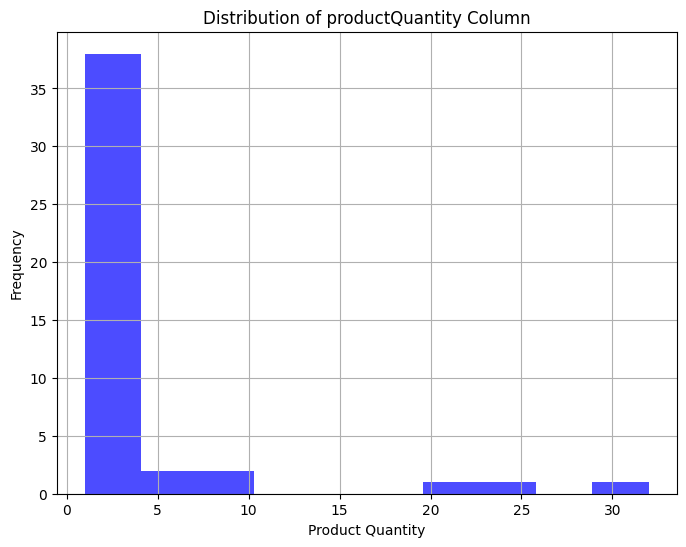

In [470]:
# Create a histogram to visualize the distribution of the 'productQuantity' column, with specified figure size, color, and labels for clarity.
plt.figure(figsize=(8, 6))
df['productQuantity'].hist(bins=10, alpha=0.7, color='blue')
plt.title('Distribution of productQuantity Column')
plt.xlabel('Product Quantity')
plt.ylabel('Frequency')
plt.show()

The distribution graph of the `productQuantity` column shows that ***most visitors purchase between 1 and 4 products when visiting the e-commerce site***.

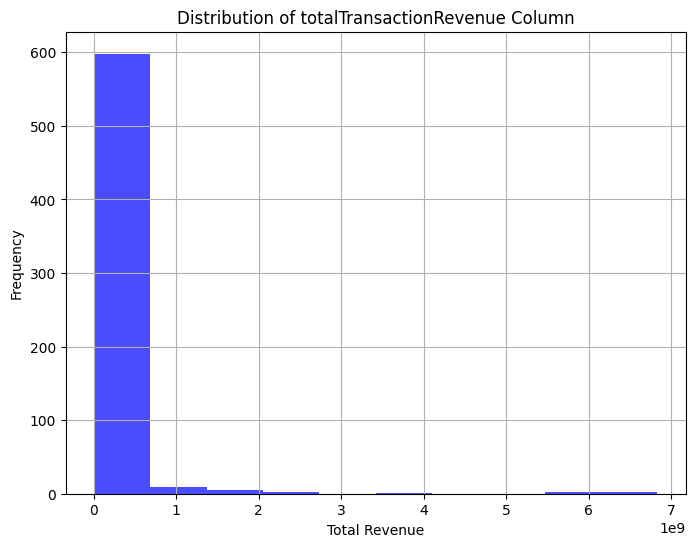

In [471]:
# Create a histogram to visualize the distribution of the 'totalTransactionRevenue' column, with specified figure size, color, and labels for clarity.
plt.figure(figsize=(8, 6))
df['totalTransactionRevenue'].hist(bins=10, alpha=0.7, color='blue')
plt.title('Distribution of totalTransactionRevenue Column')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

The distribution graph of the `totalTransactionRevenue` column shows that ***most transactions have a value between 0, indicating either no revenue or no transactions made by visitors***.

### 3. Data Preprocessing

#### 3.1 Convert Data Column to Datatime Format

In [472]:
# Select specific columns from the dataframe to create a new dataframe for further analysis.
df_process = df[["fullVisitorId","date", "v2ProductName", "v2ProductCategory",  "productQuantity",
         "city", "country", "totalTransactionRevenue"]]

In [473]:
# Convert the 'date' column to string format and then to datetime format for proper date handling.
df_process['date'] = df['date'].astype(str)
df_process['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df_process.head()

,fullVisitorId,date,v2ProductName,v2ProductCategory,productQuantity,city,country,totalTransactionRevenue
0,2515546493837534633,2017-07-21,Suitcase Organizer Cubes,(not set),NaN,(not set),Taiwan,NaN
1,9361741997835388618,2017-04-13,26 oz Double Wall Insulated Bottle,(not set),NaN,not available in demo dataset,France,NaN
2,7313828956068851679,2017-07-27,Metal Texture Roller Pen,(not set),NaN,San Francisco,United States,NaN
3,6036794406403793540,2017-07-31,Metal Texture Roller Pen,(not set),NaN,Boulder,United States,NaN
4,7847280609739507227,2017-07-28,Metal Texture Roller Pen,(not set),NaN,not available in demo dataset,Canada,NaN


#### 3.2 Conversion Column 'productPrice' and 'totalTransactionRevenue'

In [474]:
# Convert the 'totalTransactionRevenue' from micros to the actual revenue by dividing by 1,000,000.
df_process['totalTransactionRevenue'] = df_process['totalTransactionRevenue'] / 1_000_000
df_process

,fullVisitorId,date,v2ProductName,v2ProductCategory,productQuantity,city,country,totalTransactionRevenue
0,2515546493837534633,2017-07-21,Suitcase Organizer Cubes,(not set),NaN,(not set),Taiwan,NaN
1,9361741997835388618,2017-04-13,26 oz Double Wall Insulated Bottle,(not set),NaN,not available in demo dataset,France,NaN
2,7313828956068851679,2017-07-27,Metal Texture Roller Pen,(not set),NaN,San Francisco,United States,NaN
3,6036794406403793540,2017-07-31,Metal Texture Roller Pen,(not set),NaN,Boulder,United States,NaN
4,7847280609739507227,2017-07-28,Metal Texture Roller Pen,(not set),NaN,not available in demo dataset,Canada,NaN
...,...,...,...,...,...,...,...,...
9995,8518740059623315737,2016-08-09,Sport Bag,Home/Limited Supply/Bags/,NaN,Ann Arbor,United States,NaN
9996,1592171014215970461,2016-10-05,Sport Bag,Home/Bags/,NaN,Bogota,Colombia,NaN
9997,6776942687101397292,2016-09-01,Sport Bag,Home/Bags/,NaN,not available in demo dataset,Israel,NaN
9998,3008082643543388126,2016-09-29,Sport Bag,Home/Bags/,NaN,Montreal,Canada,NaN


#### 3.3 Imputation Column 'productQuantity' and 'totalTransactionRevenue'

In [475]:
# Handle missing values by imputing zeros for 'productQuantity' and 'totalTransactionRevenue', then convert 'productQuantity' to integer type.
df_process[['productQuantity','totalTransactionRevenue']] = df_process[['productQuantity','totalTransactionRevenue']].fillna(0)
df_process['productQuantity'] = df_process['productQuantity'].astype(int)
df_process.head()

,fullVisitorId,date,v2ProductName,v2ProductCategory,productQuantity,city,country,totalTransactionRevenue
0,2515546493837534633,2017-07-21,Suitcase Organizer Cubes,(not set),0,(not set),Taiwan,0.0
1,9361741997835388618,2017-04-13,26 oz Double Wall Insulated Bottle,(not set),0,not available in demo dataset,France,0.0
2,7313828956068851679,2017-07-27,Metal Texture Roller Pen,(not set),0,San Francisco,United States,0.0
3,6036794406403793540,2017-07-31,Metal Texture Roller Pen,(not set),0,Boulder,United States,0.0
4,7847280609739507227,2017-07-28,Metal Texture Roller Pen,(not set),0,not available in demo dataset,Canada,0.0


In [476]:
# Calculate the count and percentage of missing values for each column, then create a summary DataFrame sorted by missing percentage.
missing_count = df_process.isna().sum()
missing_percentage = (df_process.isna().sum() / len(df_process)) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percentage': missing_percentage
})

missing_summary = missing_summary.sort_values(by='missing_percentage', ascending=False)
missing_summary

,missing_count,missing_percentage
fullVisitorId,0,0.0
date,0,0.0
v2ProductName,0,0.0
v2ProductCategory,0,0.0
productQuantity,0,0.0
city,0,0.0
country,0,0.0
totalTransactionRevenue,0,0.0


### 4. Analysis per Objective and Visualization

#### 4.1 Top Product per Day based on Total Transaction Revenue per Day.   

Top 10 Products by Total Transaction Revenue:
                      v2ProductName  totalTransactionRevenue
45                  Google Tote Bag                 18628.40
15         Collapsible Shopping Bag                 12330.00
72                        Sport Bag                  9624.53
30                 Google Lunch Bag                  8855.73
19      Electronics Accessory Pouch                  8597.52
22  Google Canvas Tote Natural/Navy                  7532.61
83             YouTube RFID Journal                  6831.96
66            Reusable Shopping Bag                  6501.12
76               Waterpoof Gear Bag                  6425.57
56   Google Zipper-front Sports Bag                  5412.27


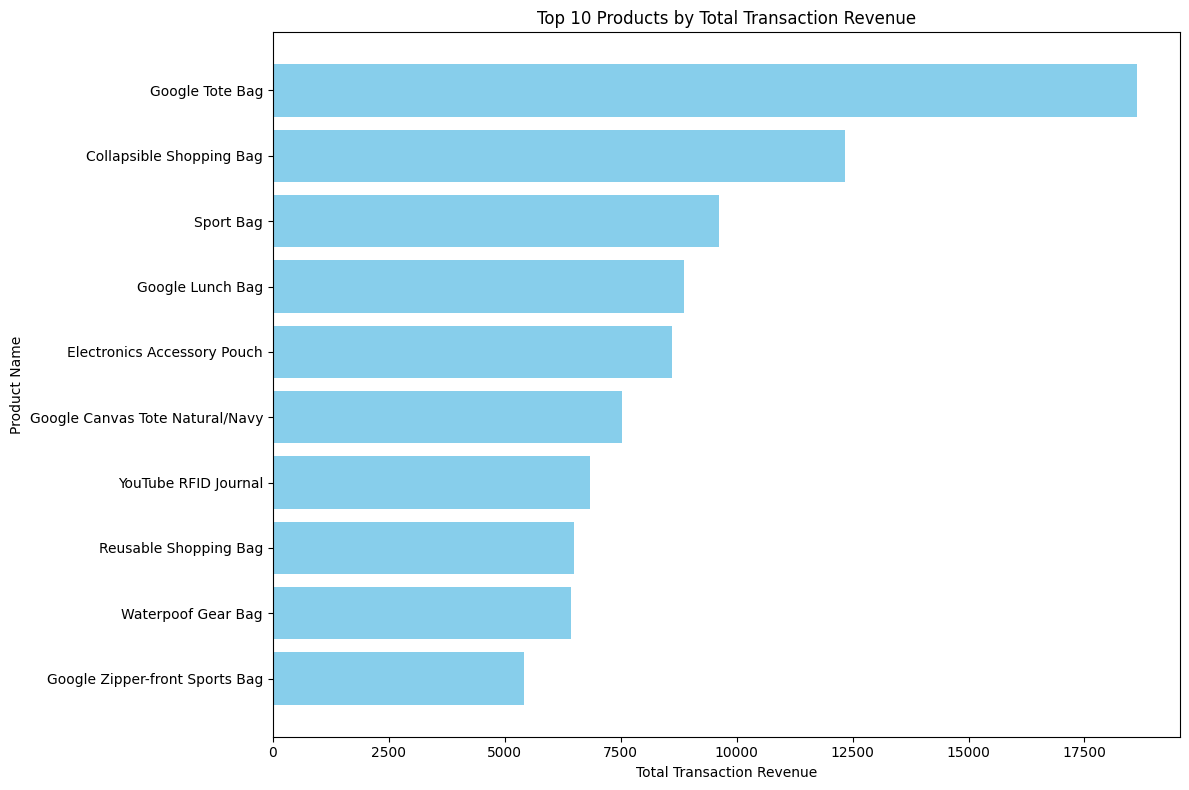

In [477]:
# Calculate the total transaction revenue for each product, sort the products by revenue, 
product_revenue = df_process.groupby('v2ProductName')['totalTransactionRevenue'].sum().reset_index()
    
# Sort by revenue in descending order
product_revenue = product_revenue.sort_values('totalTransactionRevenue', ascending=False)
    
# Get top 10 products
top_products = product_revenue.head(10)
    
print(f"Top 10 Products by Total Transaction Revenue:")
print(top_products)

# Display the top 5 products with the highest revenue
plt.figure(figsize=(12, 8))
plt.barh(
    top_products['v2ProductName'],
    top_products['totalTransactionRevenue'],
    color='skyblue'
)
plt.title('Top 10 Products by Total Transaction Revenue')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Product Name')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

Here is the visualization of the Top 5 Products by Total Transaction Revenue.8 out of the top 10 highest-revenue products are `bags`.


Top 5 Category Products by Total Transaction Revenue:
           v2ProductCategory  totalTransactionRevenue
5                 Home/Bags/                 71640.21
2      Home/Accessories/Fun/                 22919.00
9  Home/Limited Supply/Bags/                 22361.67
1                  (not set)                  7797.57
3      Home/Accessories/Pet/                  4772.83


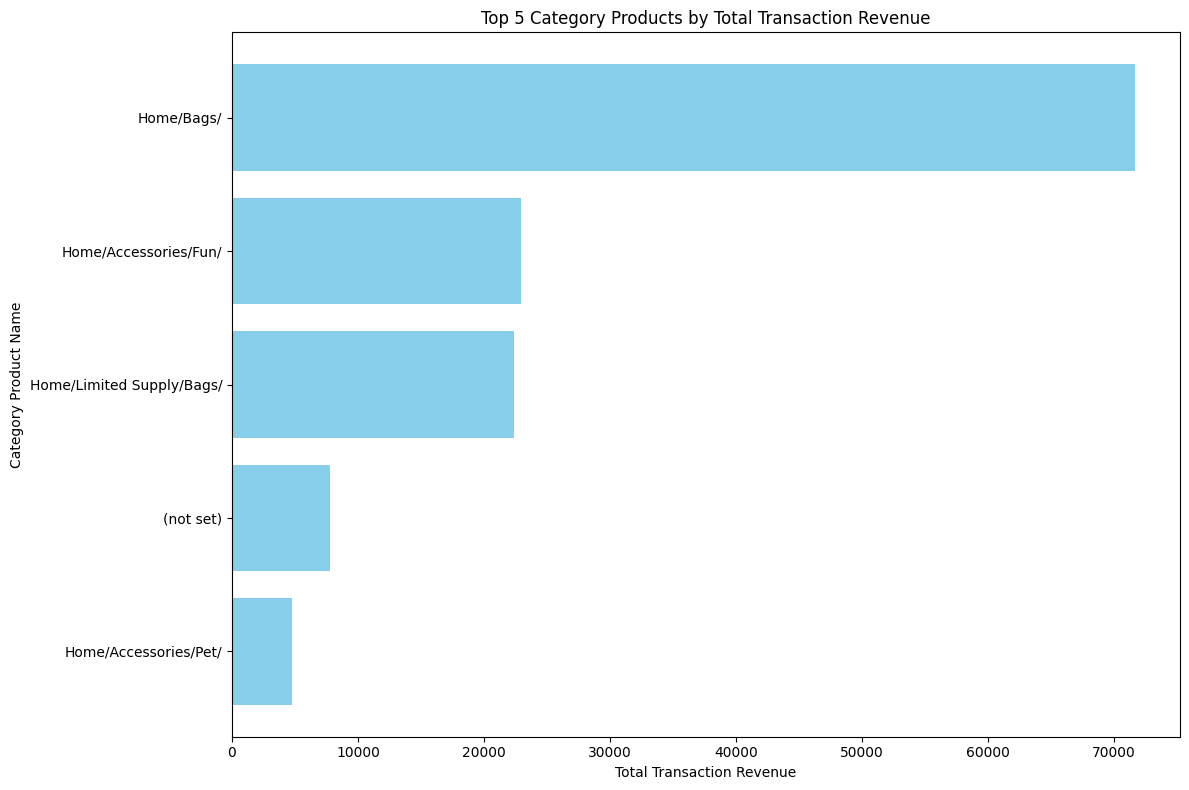

In [478]:
# Calculate the total transaction revenue for each product category, sort by revenue, 
product_cat_revenue = df_process.groupby('v2ProductCategory')['totalTransactionRevenue'].sum().reset_index()
    
# Sort by revenue in descending order
product_cat_revenue = product_cat_revenue.sort_values('totalTransactionRevenue', ascending=False)
    
# Get top N products
top_products = product_cat_revenue.head(5)
    
print(f"Top 5 Category Products by Total Transaction Revenue:")
print(top_products)

# Display the top 5 categories with the highest revenue
plt.figure(figsize=(12, 8))
plt.barh(
    top_products['v2ProductCategory'],
    top_products['totalTransactionRevenue'],
    color='skyblue'
)
plt.title('Top 5 Category Products by Total Transaction Revenue')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Category Product Name')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

It is also observed that the `bag` category dominates most of the products sold.

#### 4.2 Detecting Anomalies. 

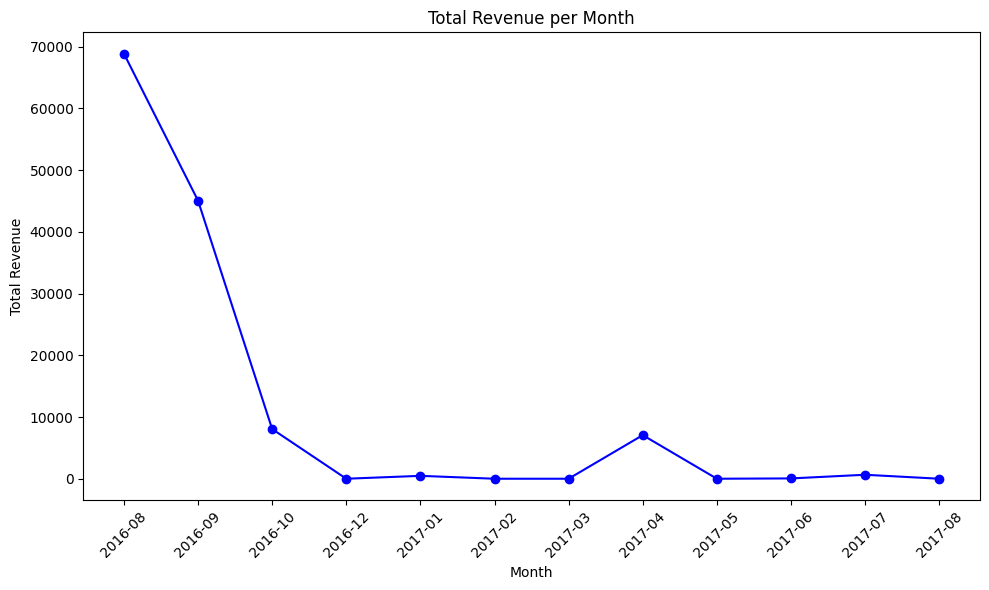

In [479]:
# Create a new column 'year_month' to store the year and month as a period format
df_process['year_month'] = df_process['date'].dt.to_period('M').astype(str)

# Aggregate total revenue by month
monthly_revenue = df_process.groupby('year_month')['totalTransactionRevenue'].sum().reset_index()

# Visualize the total revenue per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['year_month'].astype(str), monthly_revenue['totalTransactionRevenue'], marker='o', color='b')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It can be observed that there was a significant drop in revenue to zero between August 2016 and December 2016. Afterwards, the revenue remained very low, close to zero, until an increase occurred between March 2017 and April 2017, before declining again back to zero.

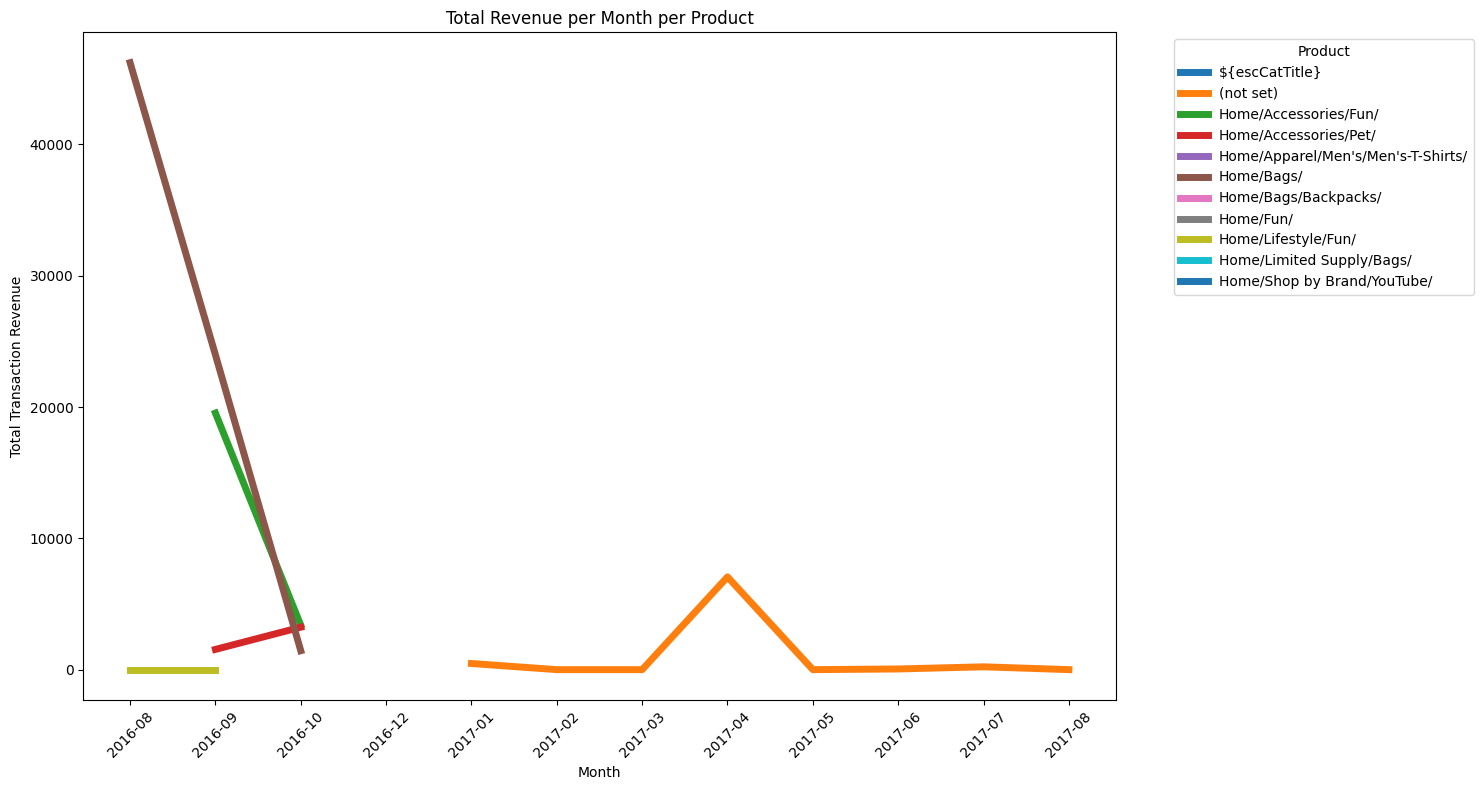

In [480]:
# Aggregate total revenue by month and product category
monthly_product_revenue = (
    df_process.groupby(['year_month', 'v2ProductCategory'])['totalTransactionRevenue']
    .sum()
    .reset_index()
)
# Pivot the data to get a table where rows are months, columns are product categories, and values are total revenue
pivot_table = monthly_product_revenue.pivot(index='year_month', columns='v2ProductCategory', values='totalTransactionRevenue')

# Visualize the total revenue per month per product category
plt.figure(figsize=(15, 8))

for product in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[product], label=product,  linewidth=5)

plt.title('Total Revenue per Month per Product')
plt.xlabel('Month')
plt.ylabel('Total Transaction Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It can be seen that from August 2016 to October 2016, the revenue was generated from the sales of products in the "Bag" category, before dropping significantly. Between October 2016 and January 2017, no products were sold. However, after that period, specifically around December 2017, only products with an unclear category label ("not set") were sold.

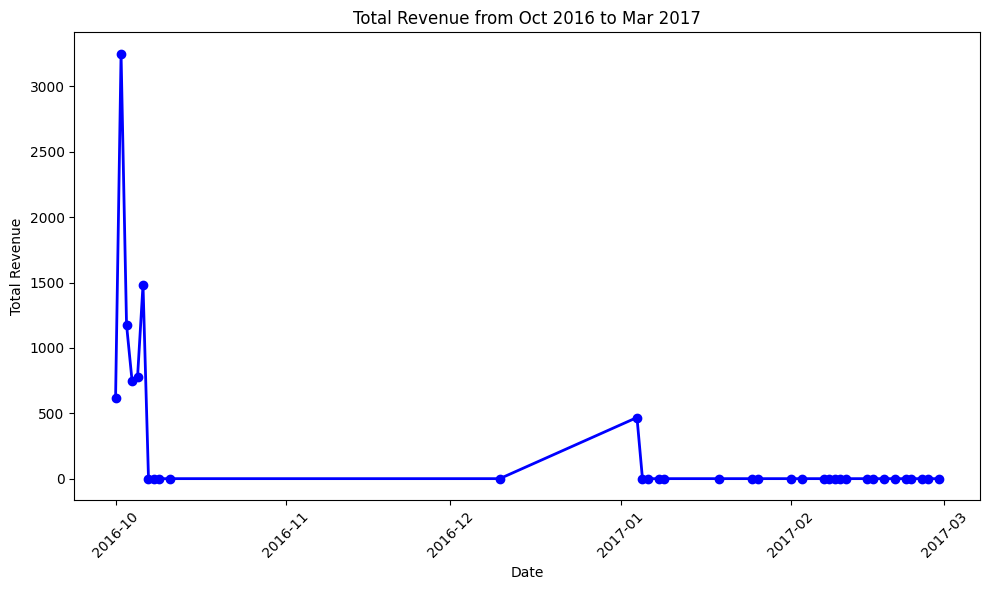

In [481]:
# Filter data by time range
filtered_df = df_process[(df_process['date'] >= '2016-10') & (df_process['date'] <= '2017-03')]

# Group by date and sum total revenue for each day
daily_revenue = filtered_df.groupby('date')['totalTransactionRevenue'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['date'], daily_revenue['totalTransactionRevenue'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Total Revenue from Oct 2016 to Mar 2017')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



To gain clearer insights, a visualization was created to show the total revenue from October 2016 to February 2017.

In [482]:
# Filter data by time range
filtered_df = df_process[(df_process['date'] >= '2016-10-15') & (df_process['date'] <= '2016-12-01')]
filtered_df

,fullVisitorId,date,v2ProductName,v2ProductCategory,productQuantity,city,country,totalTransactionRevenue,year_month


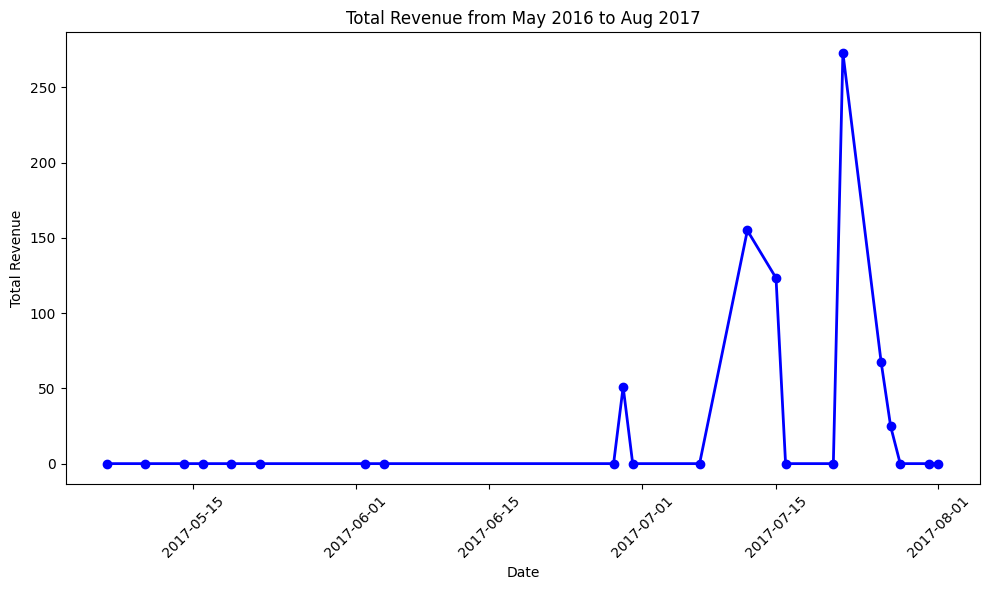

In [483]:
# Filter data by time range
filtered_df = df_process[(df_process['date'] >= '2017-05') & (df_process['date'] <= '2017-08')]

# Group by date and sum total revenue for each day
daily_revenue = filtered_df.groupby('date')['totalTransactionRevenue'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['date'], daily_revenue['totalTransactionRevenue'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Total Revenue from May 2016 to Aug 2017')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [484]:
# Filter data by time range
filtered_df = df_process[(df_process['date'] >= '2017-06-05') & (df_process['date'] <= '2017-06-25')]
filtered_df

,fullVisitorId,date,v2ProductName,v2ProductCategory,productQuantity,city,country,totalTransactionRevenue,year_month


From the anomaly analysis, it was found that there were days with no visitor data, meaning no one visited the e-commerce site. This issue needs further investigation to understand the cause, whether it was due to the site/app being inaccessible or other reasons.

#### 4.3 Finding Most Profitable Locations. 

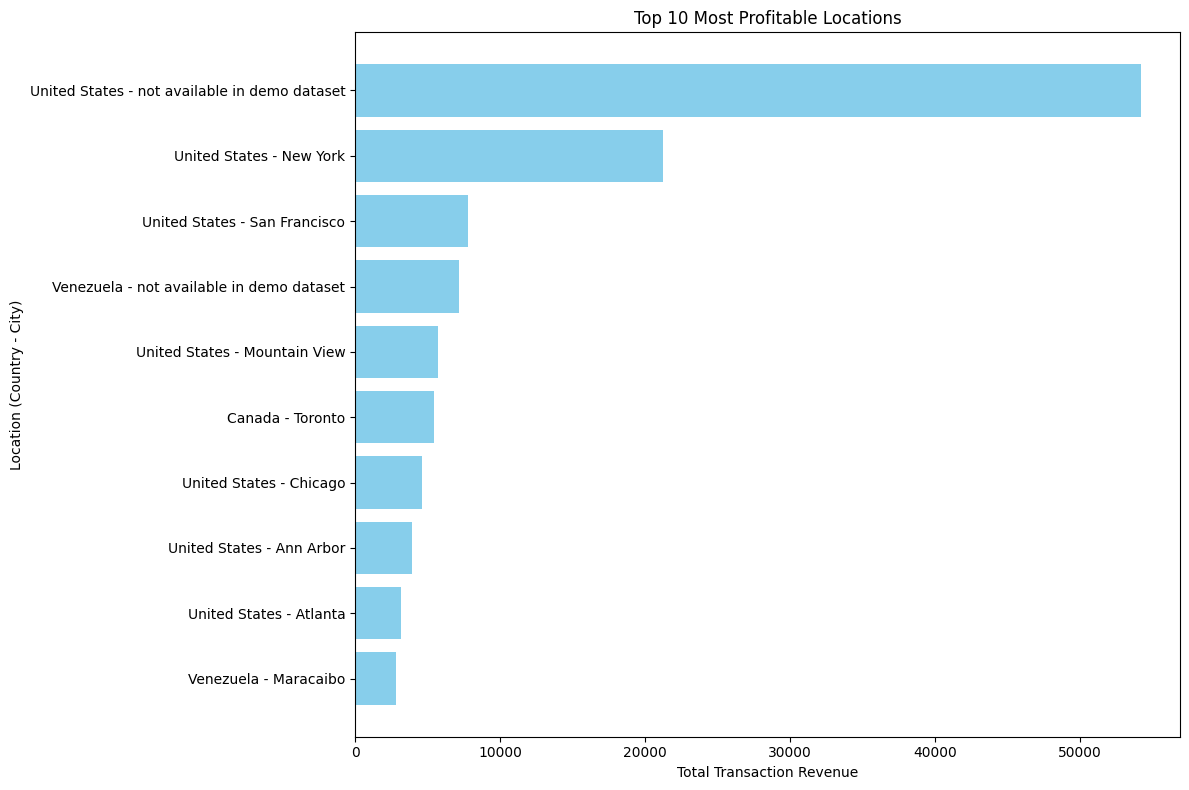

In [485]:
# Group by country and city, then calculate total revenue
location_revenue = (
    df_process.groupby(['country', 'city'])['totalTransactionRevenue']
    .sum()
    .reset_index()
)

# Sort by highest total revenue
location_revenue = location_revenue.sort_values('totalTransactionRevenue', ascending=False)

# Take the Top 10 locations
top_locations = location_revenue.head(10)

# Combine country and city into one label
top_locations['location'] = top_locations['country'] + " - " + top_locations['city']

# Bar chart visualization
plt.figure(figsize=(12, 8))
plt.barh(top_locations['location'], top_locations['totalTransactionRevenue'], color='skyblue')
plt.title('Top 10 Most Profitable Locations')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Location (Country - City)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

It can be seen that the United States is the country with the most significant total revenue.

## Conclusion

1. ChatGPT can assist in the analysis process for this case, but mainly by providing general recommendations. It is important to clearly understand the key analytical needs, the data used, and relevant methods to ensure accurate analysis results.
2. Some methods suggested by ChatGPT were not used in this analysis because they were considered less appropriate for the objective.
3. The given objectives could be addressed using descriptive analysis and visualization without the need for complex statistical methods, such as in the anomaly detection analysis.

## Suggestion

1. Business Suggestions
    - Conduct deeper analysis to understand why visitors frequently visit the site/app but do not complete transactions.
        - Investigate issues like website usability, unclear product details, or checkout problems that may cause visitors to abandon their purchases.
    - Investigate the reasons why there are certain days with no visitor data recorded.
        - Identify potential causes such as website downtime, tracking issues, or server problems that prevent data collection.
    - Find out why only one product category was sold during specific periods.
        - Check if inventory, promotions, or product visibility are affecting sales in other categories during those periods.

2. Technical Suggestions
    - Adjust the date column format to datetime to better track visitor activity times and to help identify duplicate data.
    - Improve data labeling, especially for the productCategory column, to provide more complete and useful information.